In [1]:
import random
import copy
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import io

def C2n(n):
    'returns C(2,n)'
    return n * (n-1) / 2

In [2]:
class CheckeredPageState:
    'defines a state. each column has only one queen in each state'

    def __init__(self, checkeredPage):
        self.checkeredPage = checkeredPage
        self.dimension = len(self.checkeredPage)
        self.setDic()
        self.setHeuristic()

    def setDic(self):
        'sets 3 dictionaries. for example: dicRows[i] = k means that the ith row has k queens in it. O(dimension^2)'
        dicRows = {}
        dicDiagonal1 = {}
        dicDiagonal2 = {}
        for i in range(self.dimension):
            dicRows[i] = 0
            for j in range(self.dimension):
                dicDiagonal1[i-j] = 0
                dicDiagonal2[i+j] = 0
        for i in range(self.dimension):
            for j in range(self.dimension):
                if self.checkeredPage[i][j]:
                    dicRows[i] += 1
                    dicDiagonal1[i-j] += 1
                    dicDiagonal2[j+i] += 1
        self.dicRows = dicRows
        self.dicDiagonal1 = dicDiagonal1
        self.dicDiagonal2 = dicDiagonal2

    def setHeuristic(self):
        'sets heuristic of a state.heuristic of a state is the number of pairs of queens that are attacking each other. O(dimension) '
        h = 0
        for key in self.dicRows:
            if self.dicRows[key] > 1:
                h += C2n(self.dicRows[key])
        for key in self.dicDiagonal1:
            if self.dicDiagonal1[key] > 1:
                h += C2n(self.dicDiagonal1[key])
        for key in self.dicDiagonal2:
            if self.dicDiagonal2[key] > 1:
                h += C2n(self.dicDiagonal2[key])
        self.h = h

    def getRandomSteepestAscent(self):
        'between successors of a state which have the lowest heuristic, returns a random one. O(dimension^4)'
        neighbors = []
        huristic = float("inf")
        for j in range(self.dimension):
            for i in range(self.dimension):
                if self.checkeredPage[i][j] == 1:
                    ikeep = i
                    break
            for i in range(self.dimension):
                if self.checkeredPage[i][j] == 0:
                    newCheck = copy.deepcopy(self.checkeredPage)
                    newCheck[i][j] = 1
                    newCheck[ikeep][j] = 0
                    neighbor = CheckeredPageState(newCheck)
                    if neighbor.h < huristic:
                        neighbors[:] = []
                        huristic = neighbor.h
                    if neighbor.h == huristic:
                        neighbors.append(neighbor)
        return(random.choice(neighbors))

    def getStochasticAscent(self):
        'between successors of a state which have the lowest heuristic, returns a random one. O(dimension^4)'
        neighbors = []
        huristic = float("inf")
        for j in range(self.dimension):
            for i in range(self.dimension):
                if self.checkeredPage[i][j] == 1:
                    ikeep = i
                    break
            for i in range(self.dimension):
                if self.checkeredPage[i][j] == 0:
                    newCheck = copy.deepcopy(self.checkeredPage)
                    newCheck[i][j] = 1
                    newCheck[ikeep][j] = 0
                    neighbor = CheckeredPageState(newCheck)
                    if neighbor.h < huristic:
                        neighbors[:] = []
                        huristic = neighbor.h
                    if neighbor.h == huristic:
                        neighbors.append(neighbor)
        return(random.choice(neighbors))

    def getFirstChoice(self):
        'randomly generates successors of a state until it finds a successor with heuristic lower than the hueristic of the current state'
        'otherwise it returns None'
        'O(dimension^4)'
        test = [[False for i in range(self.dimension)] for j in range(self.dimension)]
        while 1:
            i = random.randrange(0, self.dimension)
            j = random.randrange(0, self.dimension)
            test[i][j] = True
            newCheck = copy.deepcopy(self.checkeredPage)
            newCheck[i][j] = 1
            for k in range(self.dimension):
                if self.checkeredPage[k][j]:
                    ikeep = k
                    break
            newCheck[ikeep][j] = 0
            newCheck[i][j] = 1
            neighbor = CheckeredPageState(newCheck)
            if neighbor.h < self.h:
                return neighbor
            flag = True
            'checks if we have randomly generated all the successors. returns None if so'
            for x in test:
                for y in x:
                    if y is False:
                        flag = False
                        break
                if flag is False:
                    break
            if flag is True:
                return None


    def getMove(self, neighbor):
        'prints the move from the current state to the given neighbor state O(dimension^2)'
        test = False
        for j in range(self.dimension):
            for i in range(self.dimension):
                if self.checkeredPage[i][j] != neighbor.checkeredPage[i][j]:
                    if self.checkeredPage[i][j] == 1:
                        istart = i
                    else:
                        iend = i
                    if test is False:
                        test = True
                    else:
                        print("move in column "+ str(j+1) + " from row " + str(istart+1) + " to " + str(iend+1))
                        break

    def randomSuccessor(self):
        'returns a random successor of the current state O(dimension ^2)'
        j = random.randrange(0, self.dimension)
        while 1:
            i = random.randrange(0, self.dimension)
            if self.checkeredPage[i][j] != 1:
                break
        for k in range(self.dimension):
            if self.checkeredPage[k][j]:
                break
        newCheckeredPage = copy.deepcopy(self.checkeredPage)
        newCheckeredPage[i][j] = 1
        newCheckeredPage[k][j] = 0
        return CheckeredPageState(newCheckeredPage)

    def printPage(self):
        board = [[1 if self.checkeredPage[i][j] else 0 for j in range(self.dimension)] for i in range(self.dimension)]
        plt.matshow(board, cmap='binary')
        plt.xticks(range(self.dimension), [str(i+1) for i in range(self.dimension)])
        plt.yticks(range(self.dimension), [str(i+1) for i in range(self.dimension)])
        plt.xlabel('Column')
        plt.ylabel('Row')
        plt.title('Chessboard Configuration')
        for i in range(self.dimension):
            for j in range(self.dimension):
                if self.checkeredPage[i][j]:
                    plt.text(j, i, 'Q', ha='center', va='center', color='red')
        plt.show()


In [3]:
def HillCLimbingSteepestAscent(current):
    'gets the initial checkered page and performs the hill climbing algorithm steepest ascent variant'
    # current = CheckeredPageState(checkeredPageInitial)
    print("start of hill climbing algorithm steepest ascent")
    while 1:
        print("current state checkered page:")
        current.printPage()
        print("current state h:", current.h)
        neighbor = current.getRandomSteepestAscent()
        if neighbor.h >= current.h:
            if current.h == 0:
                print("the hill climbing algorithm steepest ascent variant found a solution")
                return True, current
            else:
                print("the hill climbing algorithm steepest ascent variant got stuck in local minimum")
                return False, current
        current.getMove(neighbor)
        current = neighbor

In [4]:
def HillCLimbingFirstChoice(current):
    'gets the initial checkered page and performs the hill climbing algorithm first choice variant'
    # current = CheckeredPageState(checkeredPageInitial)
    print("start of hill climbing algorithm first choice variant")
    while 1:
        print("current state checkered page:")
        current.printPage()
        print("current state h:", current.h)
        neighbor = current.getFirstChoice()
        if neighbor is None:
            if current.h == 0:
                print("the hill climbing algorithm first choice variant found a solution")
                return True, current
            else:
                print("the hill climbing algorithm first choice variant got stuck in local minimum")
                return False, current
        current.getMove(neighbor)
        current = neighbor


In [5]:
def getRandomCheckeredPage(dimension):
    'returns a random checkered page in which each column has exactly one queen in it'
    checkeredPage = [[0 for i in range(dimension)] for j in range(dimension)]
    randNumbers = random.sample(range(0, dimension), dimension)
    for j in range(dimension):
        checkeredPage[randNumbers[j]][j] = 1
    return CheckeredPageState(checkeredPage)

def HillClimbingRandomRestart(dimension):
    'gets the dimension of the page and performs the hill climbing algorithm with random restart'
    print("start of hill climbing algorithm with random restart")
    while 1:
        print("-----------------------------------")
        print("new start of hill climbing algorithm with random restart")
        checkeredPage = getRandomCheckeredPage(dimension)
        boolean, state = HillCLimbingSteepestAscent(checkeredPage)
        if boolean:
            print("the hill climbing algorithm with random restart ended")
            return state

In [6]:
def HillClimbingStochasticDescent(dimension):
    print("Start of hill climbing algorithm with stochastic descent")
    current = getRandomCheckeredPage(dimension)
    while True:
        print("-----------------------------------")
        print("Current state checkered page:")
        current.printPage()
        print("Current state h:", current.h)

        successors = []
        for _ in range(10):
            successor = current.randomSuccessor()
            if successor.h < current.h:
                return successor
            successors.append(successor)


        current = random.choice(successors)


------------------
new random check generated
start of hill climbing algorithm first choice variant
current state checkered page:


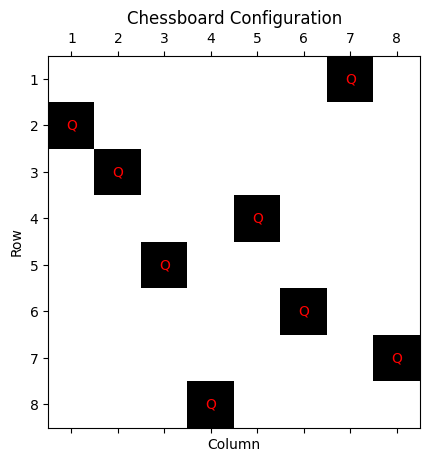

current state h: 4.0
the hill climbing algorithm first choice variant got stuck in local minimum
------------------
start of hill climbing algorithm steepest ascent
current state checkered page:


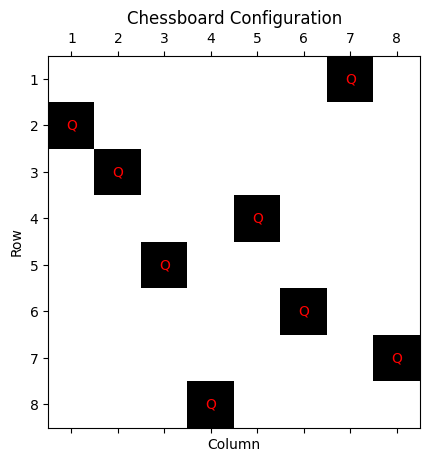

current state h: 4.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
------------------
Start of hill climbing algorithm with stochastic descent
-----------------------------------
Current state checkered page:


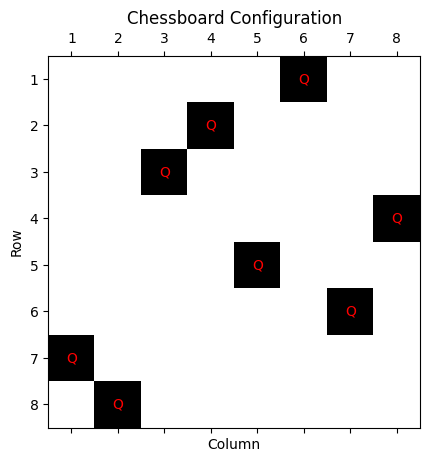

Current state h: 4.0
------------------
start of hill climbing algorithm with random restart
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


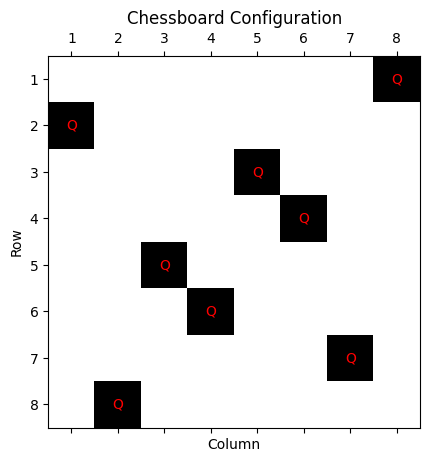

current state h: 6.0
move in column 4 from row 6 to 8
current state checkered page:


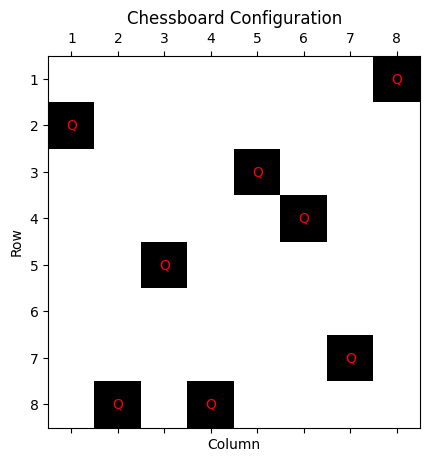

current state h: 4.0
move in column 6 from row 4 to 5
current state checkered page:


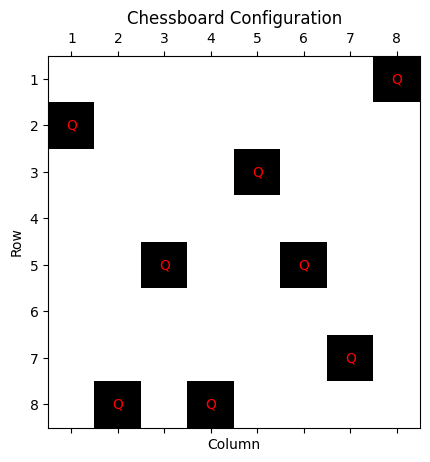

current state h: 3.0
move in column 3 from row 5 to 4
current state checkered page:


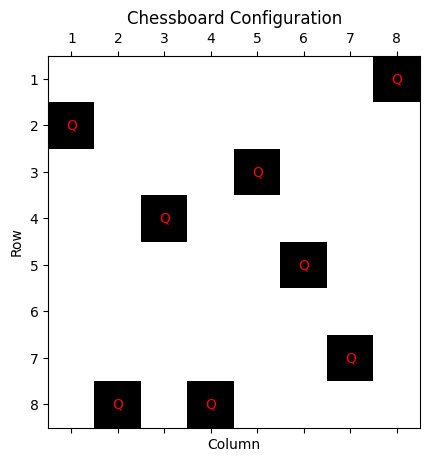

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


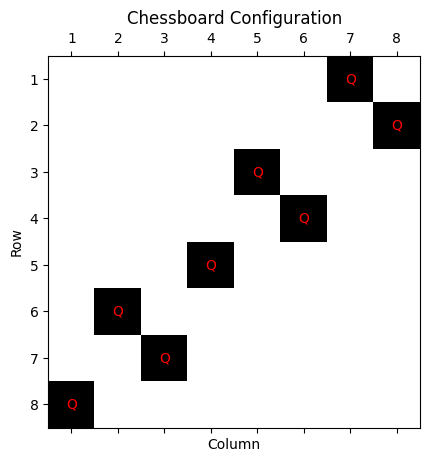

current state h: 10.0
move in column 5 from row 3 to 7
current state checkered page:


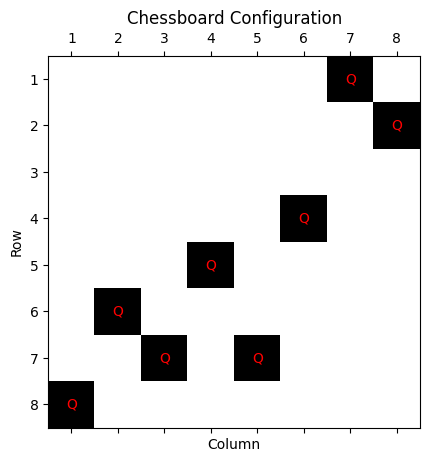

current state h: 8.0
move in column 3 from row 7 to 3
current state checkered page:


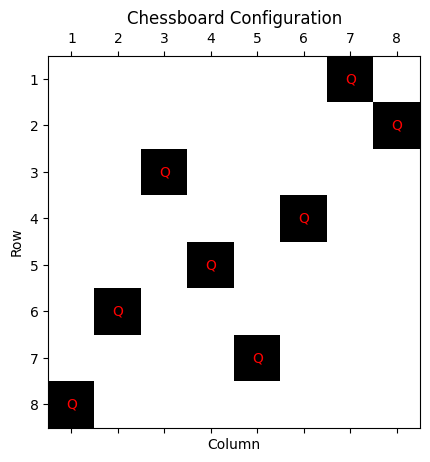

current state h: 4.0
move in column 8 from row 2 to 7
current state checkered page:


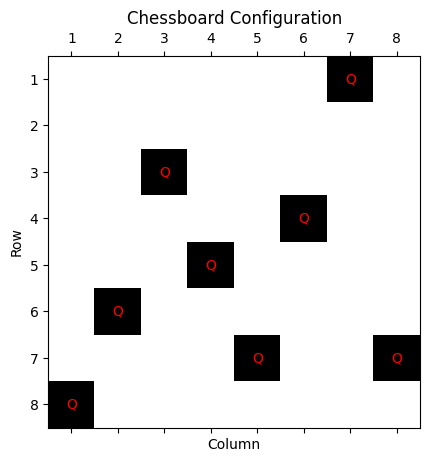

current state h: 3.0
move in column 5 from row 7 to 2
current state checkered page:


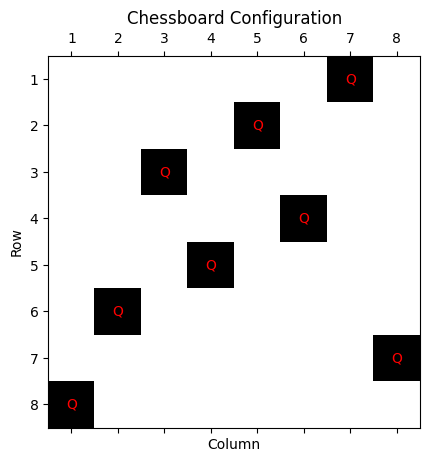

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


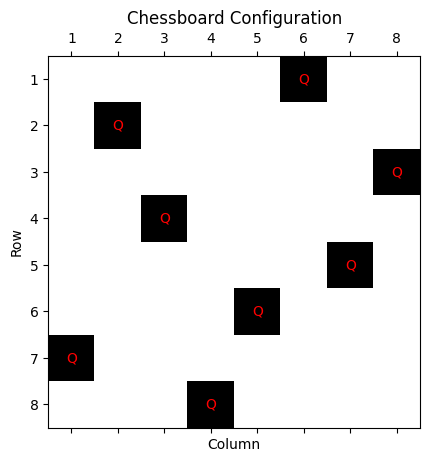

current state h: 5.0
move in column 8 from row 3 to 2
current state checkered page:


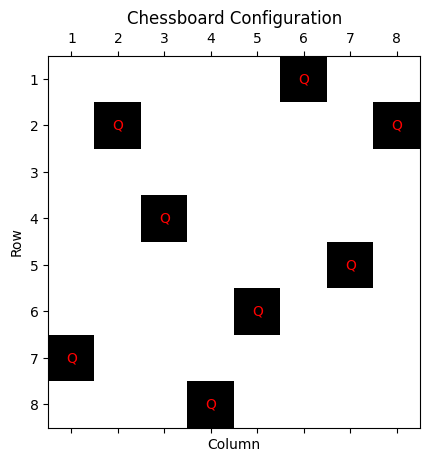

current state h: 4.0
move in column 3 from row 4 to 3
current state checkered page:


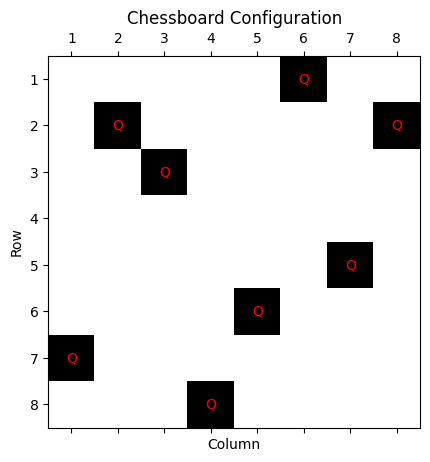

current state h: 3.0
move in column 2 from row 2 to 4
current state checkered page:


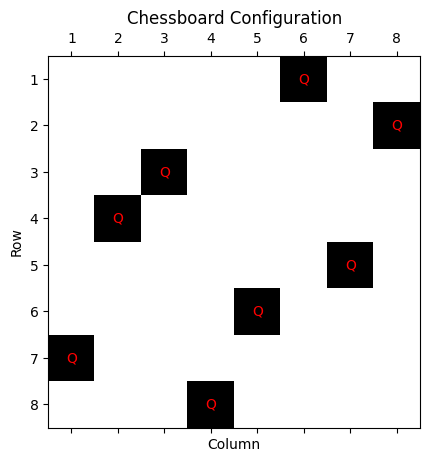

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


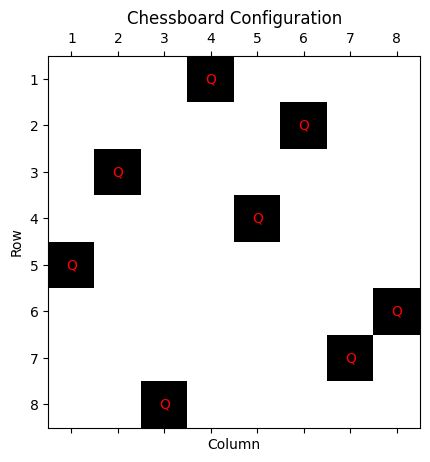

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


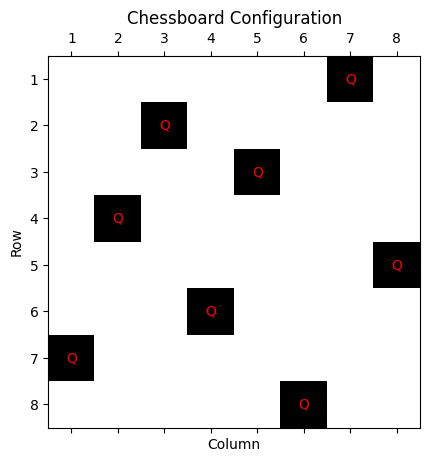

current state h: 6.0
move in column 2 from row 4 to 7
current state checkered page:


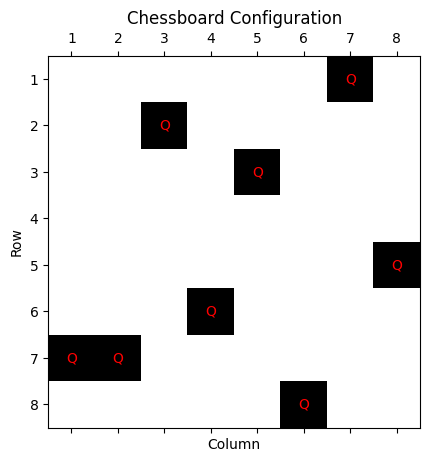

current state h: 5.0
move in column 1 from row 7 to 1
current state checkered page:


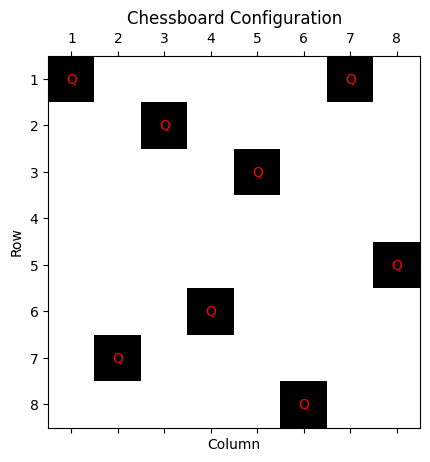

current state h: 3.0
move in column 7 from row 1 to 8
current state checkered page:


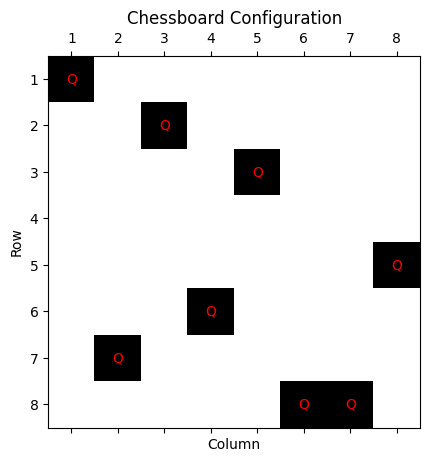

current state h: 2.0
move in column 6 from row 8 to 1
current state checkered page:


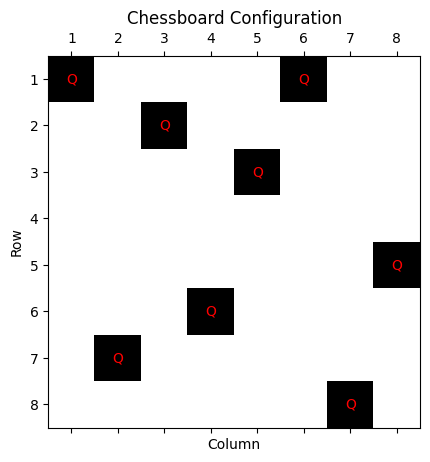

current state h: 1.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


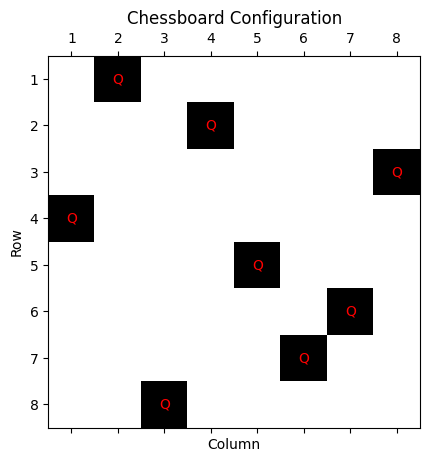

current state h: 3.0
move in column 7 from row 6 to 1
current state checkered page:


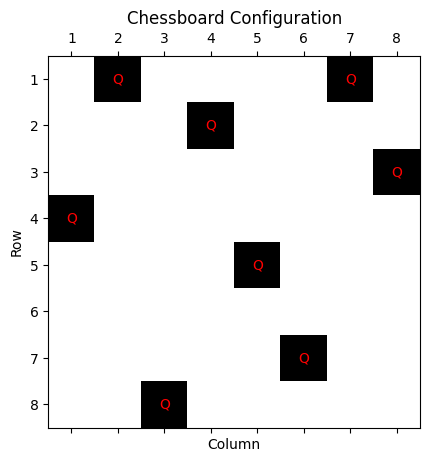

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


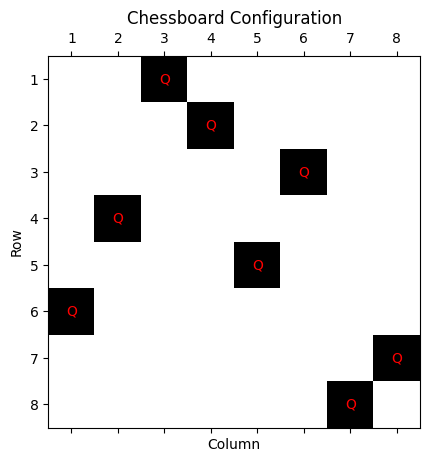

current state h: 3.0
move in column 4 from row 2 to 7
current state checkered page:


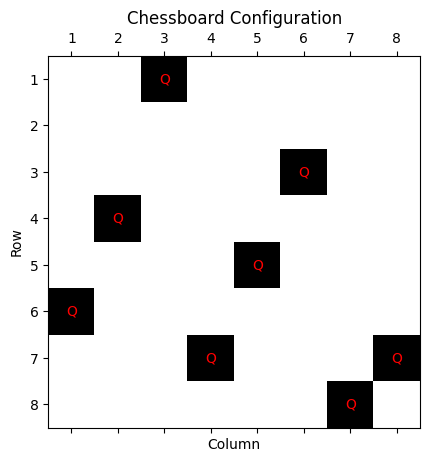

current state h: 2.0
move in column 8 from row 7 to 2
current state checkered page:


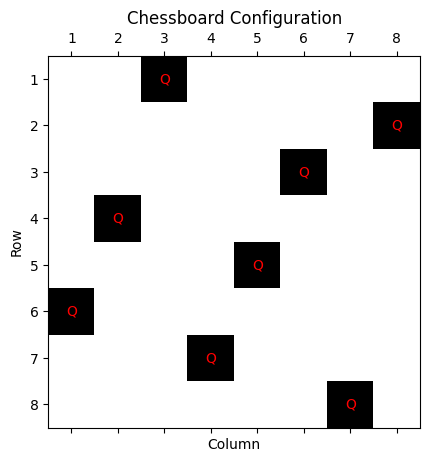

current state h: 1.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


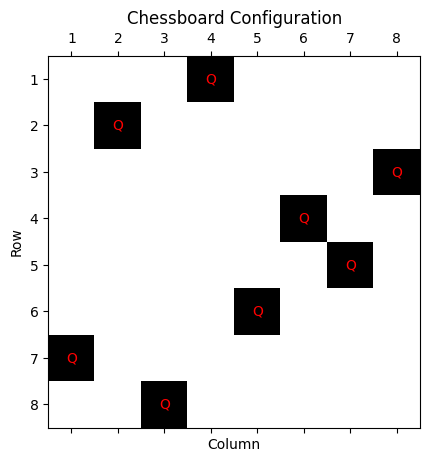

current state h: 4.0
move in column 5 from row 6 to 1
current state checkered page:


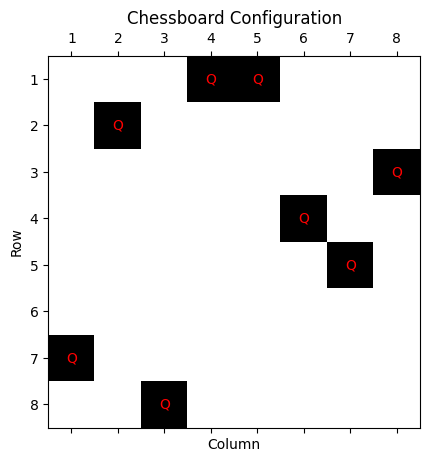

current state h: 3.0
move in column 7 from row 5 to 6
current state checkered page:


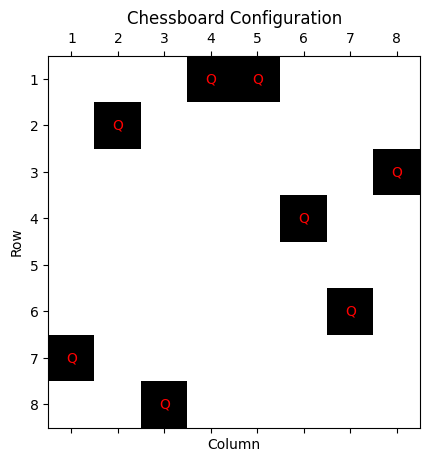

current state h: 2.0
move in column 4 from row 1 to 5
current state checkered page:


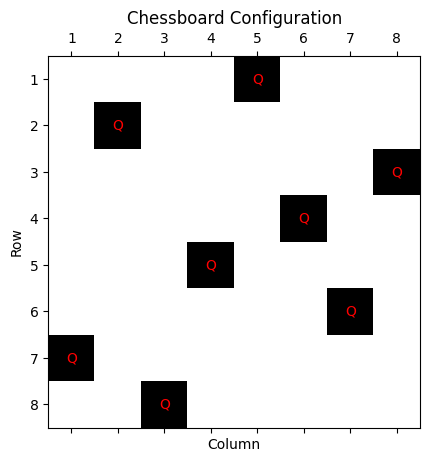

current state h: 1.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


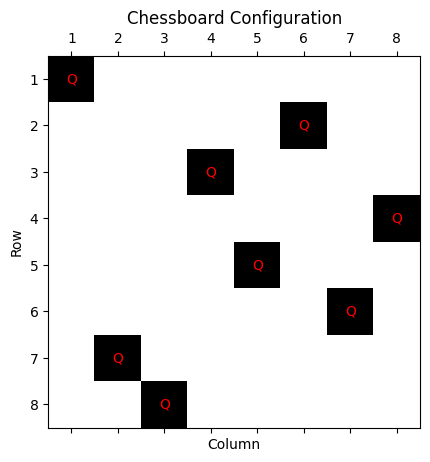

current state h: 4.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


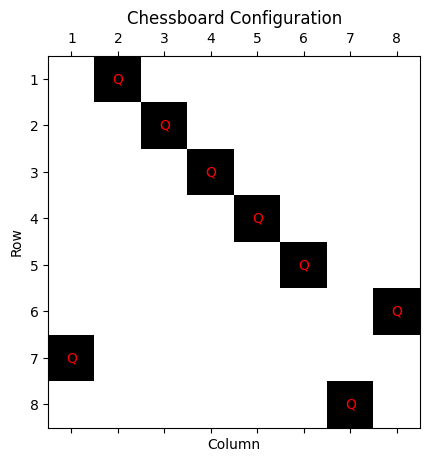

current state h: 10.0
move in column 6 from row 5 to 6
current state checkered page:


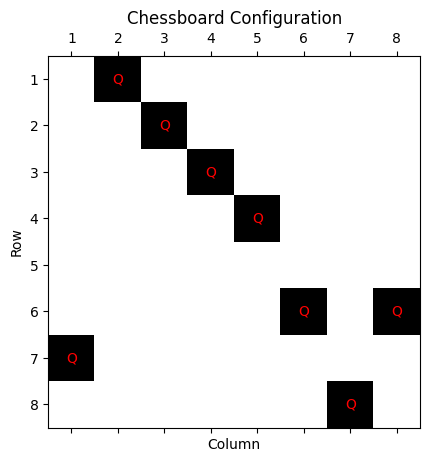

current state h: 7.0
move in column 3 from row 2 to 8
current state checkered page:


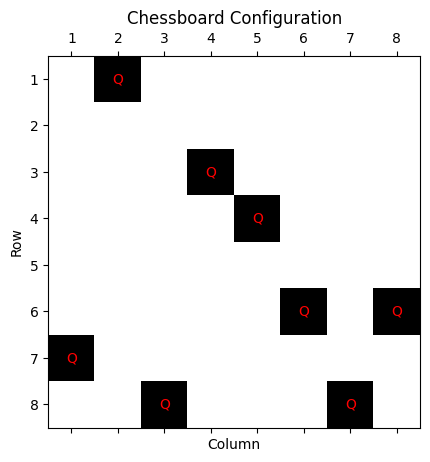

current state h: 5.0
move in column 5 from row 4 to 1
current state checkered page:


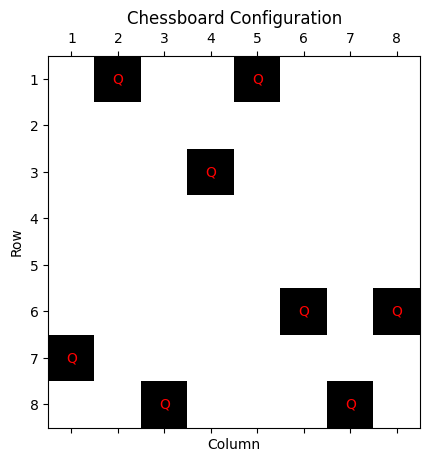

current state h: 4.0
move in column 2 from row 1 to 5
current state checkered page:


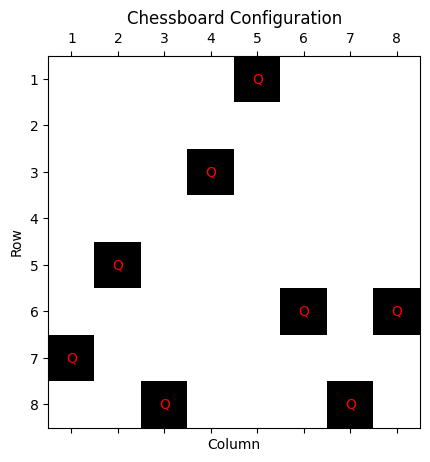

current state h: 3.0
move in column 8 from row 6 to 2
current state checkered page:


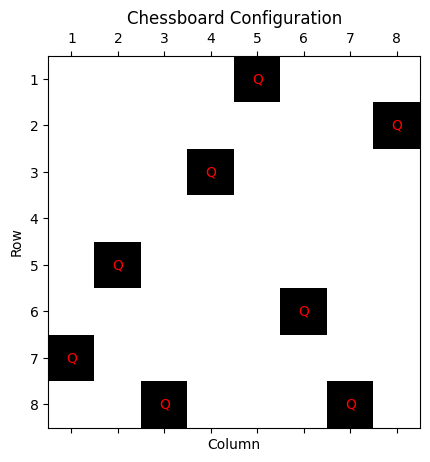

current state h: 2.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


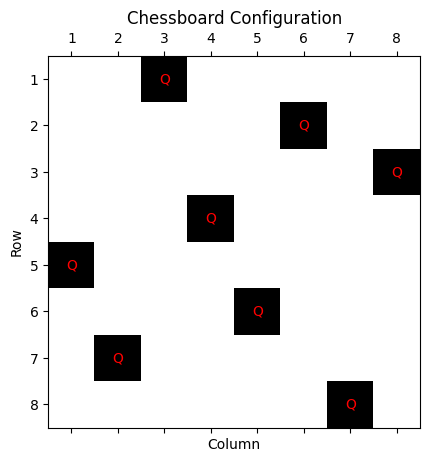

current state h: 3.0
move in column 5 from row 6 to 8
current state checkered page:


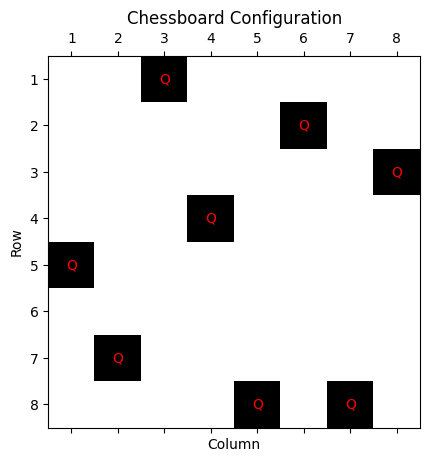

current state h: 2.0
move in column 4 from row 4 to 6
current state checkered page:


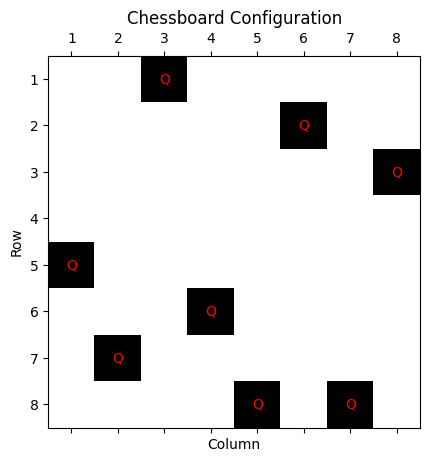

current state h: 1.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


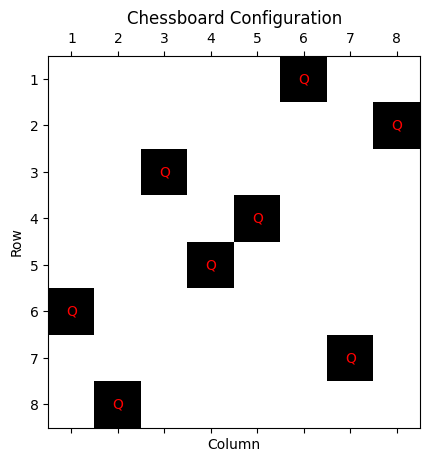

current state h: 4.0
the hill climbing algorithm steepest ascent variant got stuck in local minimum
-----------------------------------
new start of hill climbing algorithm with random restart
start of hill climbing algorithm steepest ascent
current state checkered page:


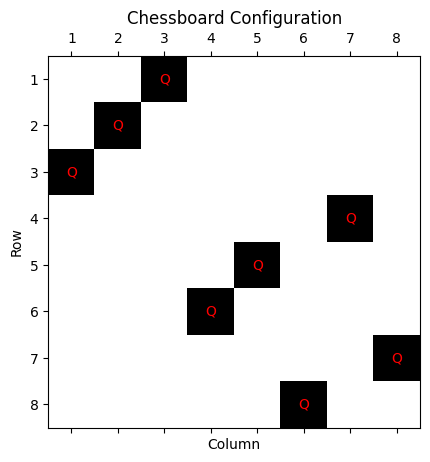

current state h: 8.0
move in column 1 from row 3 to 4
current state checkered page:


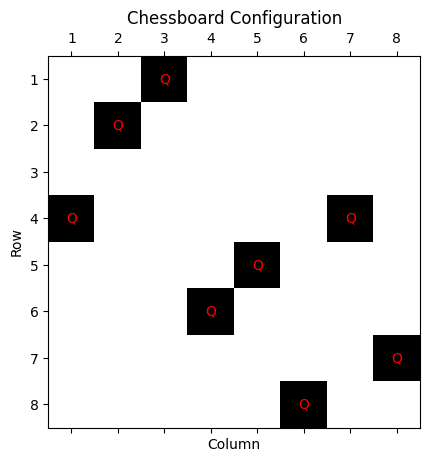

current state h: 5.0
move in column 2 from row 2 to 3
current state checkered page:


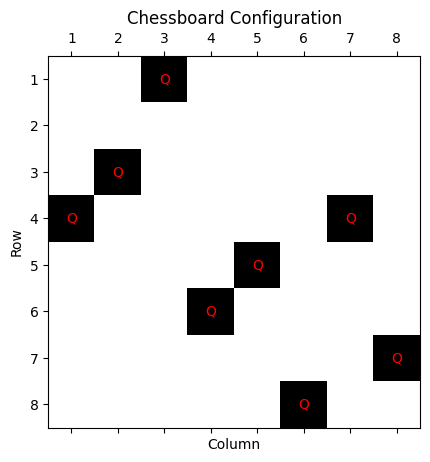

current state h: 4.0
move in column 4 from row 6 to 8
current state checkered page:


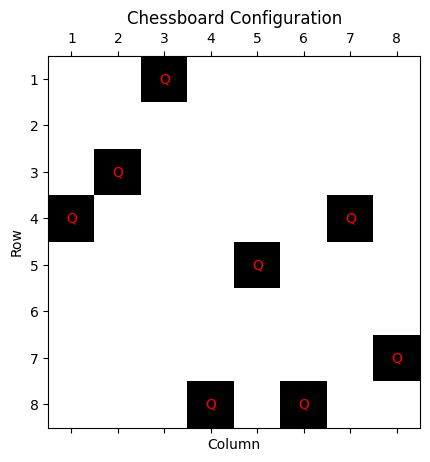

current state h: 3.0
move in column 1 from row 4 to 6
current state checkered page:


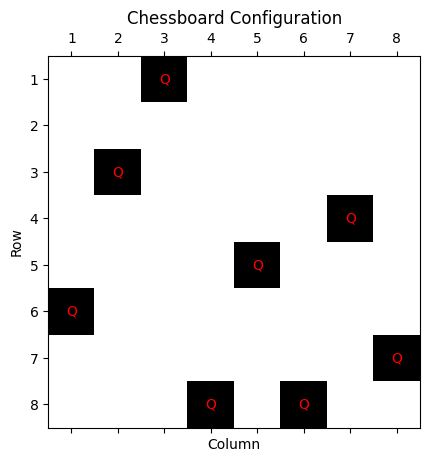

current state h: 1.0
move in column 6 from row 8 to 2
current state checkered page:


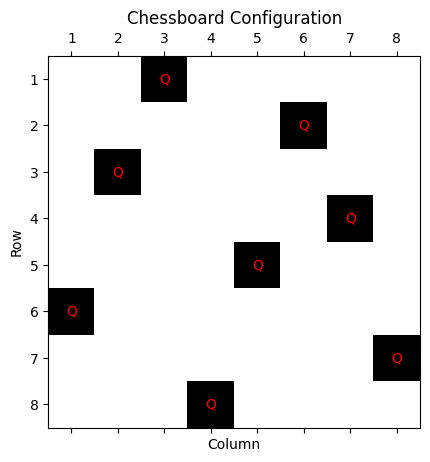

current state h: 0
the hill climbing algorithm steepest ascent variant found a solution
the hill climbing algorithm with random restart ended
------------------
run time of hill climbing first choice 0.7902328968048096
run time of hill climbing steepest ascent 0.5305185317993164
run time of hill climbing stochastic 0.4623236656188965
run time of hill climbing random restart 36.878570556640625


In [7]:
for i in range(1):
    print("------------------")
    randomCheck = getRandomCheckeredPage(8)
    print("new random check generated")
    startHillFirst = time.time()
    HillCLimbingFirstChoice(randomCheck)
    endHillFirst = time.time()
    print("------------------")
    HillCLimbingSteepestAscent(randomCheck)
    endHillSteep = time.time()
    print("------------------")
    HillClimbingStochasticDescent(8)
    endHillStoch = time.time()
    print("------------------")
    HillClimbingRandomRestart(8)
    endHillRandom = time.time()
    print("------------------")
    print("run time of hill climbing first choice", endHillFirst - startHillFirst)
    print("run time of hill climbing steepest ascent", endHillSteep - endHillFirst)
    print("run time of hill climbing stochastic", endHillStoch - endHillSteep)
    print("run time of hill climbing random restart", endHillRandom - endHillStoch)